## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First

Summary Statistics:
              Age        Income Gender
count    8.000000      8.000000     10
unique        NaN           NaN      2
top           NaN           NaN      M
freq          NaN           NaN      5
mean    30.000000  56812.500000    NaN
std      5.606119   4735.409923    NaN
min     22.000000  50000.000000    NaN
25%     27.250000  52000.000000    NaN
50%     29.500000  58500.000000    NaN
75%     32.000000  60625.000000    NaN
max     40.000000  62000.000000    NaN


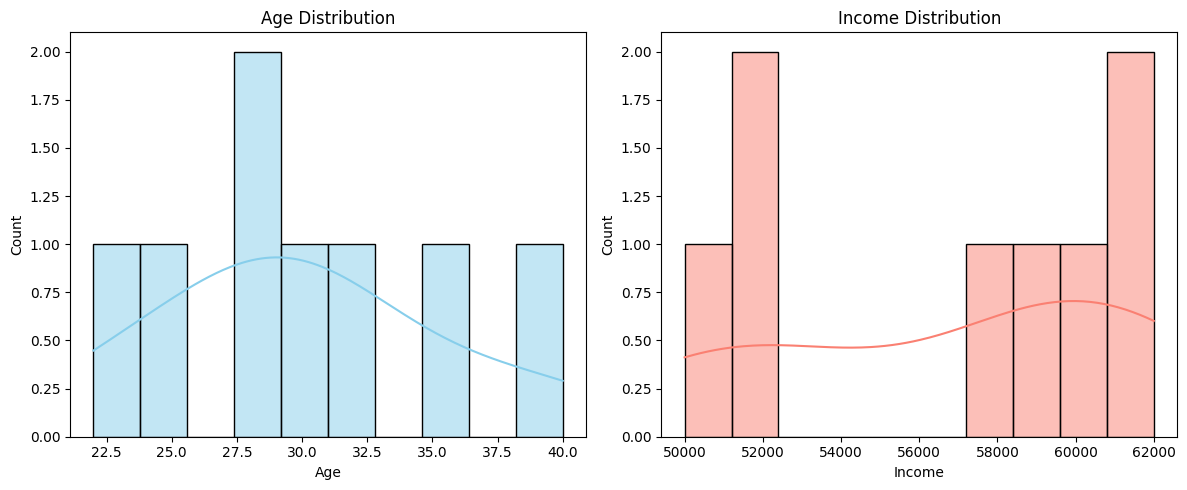


Null Values in Each Column:
Age       2
Income    2
Gender    0
dtype: int64


In [1]:
# Task 1: Summary Statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    'Age': [25, 30, None, 22, 28, None, 35, 40, 29, 31],
    'Income': [50000, 52000, 62000, 58000, None, 52000, 61000, 59000, 60500, None],
    'Gender': ['M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F']
}
df = pd.DataFrame(data)

# Task 1: Summary Statistics
print("Summary Statistics:")
print(df.describe(include='all'))

# Task 2: Visualize Data Distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True, bins=10, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.histplot(df['Income'], kde=True, bins=10, color='salmon')
plt.title('Income Distribution')

plt.tight_layout()
plt.show()

# Task 3: Checking for Null Values
print("\nNull Values in Each Column:")
print(df.isnull().sum())




# Task 2: Visualize Data Distribution





# Task 3: Checking for Null Values




## Handle Missing & Inconsistent Data Before Applying ML Models

In [2]:
import pandas as pd
import numpy as np

# Sample dataset
data = {
    'Age': [25, 30, None, 22, 28, None, 35, 40, 29, 31],
    'Income': [50000, 52000, 62000, 58000, None, 52000, 61000, 59000, 60500, None]
}
df = pd.DataFrame(data)

# Task 4: Drop Missing Values
df_dropped = df.dropna()
print("After dropping missing values:")
print(df_dropped)

# Task 5: Fill Missing Values (Age with mean, Income with median)
df_filled = df.copy()
df_filled['Age'].fillna(df_filled['Age'].mean(), inplace=True)
df_filled['Income'].fillna(df_filled['Income'].median(), inplace=True)
print("\nAfter filling missing values:")
print(df_filled)

# Task 6: Handling Outliers with Capping (Winsorization)
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

df_capped = df_filled.copy()
df_capped['Age'] = cap_outliers(df_capped['Age'])
df_capped['Income'] = cap_outliers(df_capped['Income'])
print("\nAfter capping outliers:")
print(df_capped)


After dropping missing values:
    Age   Income
0  25.0  50000.0
1  30.0  52000.0
3  22.0  58000.0
6  35.0  61000.0
7  40.0  59000.0
8  29.0  60500.0

After filling missing values:
    Age   Income
0  25.0  50000.0
1  30.0  52000.0
2  30.0  62000.0
3  22.0  58000.0
4  28.0  58500.0
5  30.0  52000.0
6  35.0  61000.0
7  40.0  59000.0
8  29.0  60500.0
9  31.0  58500.0

After capping outliers:
    Age   Income
0  25.0  50000.0
1  30.0  52000.0
2  30.0  62000.0
3  24.5  58000.0
4  28.0  58500.0
5  30.0  52000.0
6  34.5  61000.0
7  34.5  59000.0
8  29.0  60500.0
9  31.0  58500.0


## Choose the Right Scaling Method

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler

# Sample dataset
data = {
    'Age': [25, 30, 22, 28, 35, 40, 29, 31],
    'Income': [50000, 52000, 58000, 61000, 70000, 59000, 60500, 62000]
}
df = pd.DataFrame(data)

# Task 7: Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[['Age', 'Income']] = minmax_scaler.fit_transform(df[['Age', 'Income']])
print("Min-Max Scaled Data:")
print(df_minmax)

# Task 8: Robust Scaling
robust_scaler = RobustScaler()
df_robust = df.copy()
df_robust[['Age', 'Income']] = robust_scaler.fit_transform(df[['Age', 'Income']])
print("\nRobust Scaled Data:")
print(df_robust)

# Task 9: MaxAbs Scaling
maxabs_scaler = MaxAbsScaler()
df_maxabs = df.copy()
df_maxabs[['Age', 'Income']] = maxabs_scaler.fit_transform(df[['Age', 'Income']])
print("\nMaxAbs Scaled Data:")
print(df_maxabs)


Min-Max Scaled Data:
        Age  Income
0  0.166667   0.000
1  0.444444   0.100
2  0.000000   0.400
3  0.333333   0.550
4  0.722222   1.000
5  1.000000   0.450
6  0.388889   0.525
7  0.500000   0.600

Robust Scaled Data:
        Age    Income
0 -0.947368 -2.052632
1  0.105263 -1.631579
2 -1.578947 -0.368421
3 -0.315789  0.263158
4  1.157895  2.157895
5  2.210526 -0.157895
6 -0.105263  0.157895
7  0.315789  0.473684

MaxAbs Scaled Data:
     Age    Income
0  0.625  0.714286
1  0.750  0.742857
2  0.550  0.828571
3  0.700  0.871429
4  0.875  1.000000
5  1.000  0.842857
6  0.725  0.864286
7  0.775  0.885714


## Keep Track of Data Transformations for Reproducibility

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Sample dataset with missing values
data = {
    'Age': [25, 30, None, 22, 28, None, 35],
    'Income': [50000, 52000, 62000, 58000, None, 52000, 61000]
}
df = pd.DataFrame(data)

# Initialize log list
transformation_log = []

# Task 10: Log Data Preprocessing Steps
transformation_log.append("Started preprocessing dataset")

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
transformation_log.append("Filled missing values with mean")

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)
transformation_log.append("Applied Min-Max scaling")

# Display log
print("Preprocessing Steps Log:")
for step in transformation_log:
    print("-", step)

# Task 11: Store Transformation Parameters
imputer_params = {'strategy': imputer.strategy}
scaler_params = {
    'min_': scaler.min_.tolist(),
    'scale_': scaler.scale_.tolist()
}

print("\nImputer Parameters:", imputer_params)
print("Scaler Parameters:", scaler_params)


Preprocessing Steps Log:
- Started preprocessing dataset
- Filled missing values with mean
- Applied Min-Max scaling

Imputer Parameters: {'strategy': 'mean'}
Scaler Parameters: {'min_': [-1.6923076923076925, -4.166666666666667], 'scale_': [0.07692307692307693, 8.333333333333333e-05]}
